In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
filename = 'DataSets//index.txt'
x,y = np.loadtxt(filename,dtype='str',usecols=(0,1),unpack=True)

In [94]:
def func_y_pred(x,m,b):
    return (m+b*x)

In [66]:
x = x.astype('int64')
y = y.astype('int64')

In [71]:
print(x.min())
print(x.max())
print(y.min())
print(y.max())

2
138
4
40


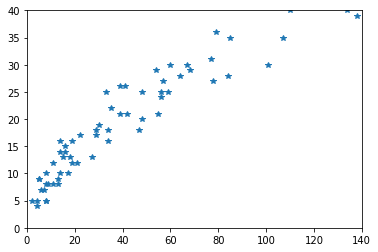

In [82]:
plt.axis(xmin=0,xmax=140,ymin=0,ymax=40)
plt.plot(x,y,'*')

In [92]:
def get_(x,y):
    y_mean = np.divide(np.sum(y),len(y))
    x_mean = np.divide(np.sum(x),len(x))
    
    x_term = x-x_mean
    y_term = y-y_mean
    m_num = np.sum(x_term*y_term)
    m_den = np.sum(np.power(x_term,2))
    
    b = np.divide(m_num,m_den)
    m = y_mean-b*x_mean
    
    return m,b

In [111]:
def func_sq_err(y,y_hat):
    r_num = np.sum(np.power(y_hat,2))
    m = len(y)
    err = np.sqrt(np.divide(r_num,m))
    return err

In [117]:
m,b = least_sq_err(x,y)
y_pred = func_y_pred(x,m,b)
y_hat = y-y_pred
err = func_sq_err(y,y_hat)
print("m : ",m)
print("b : ",b)
print("r2 : ",err)

m :  8.024522686506431
b :  0.27901864457713266
r2 :  3.467354561792638


In [ ]:
def func_least_sq_err(x,y):
    y-(m+b*x)